# Problem Formulation

>**The problem:** 

we are going to predict the probability that the dating session will lead to a successful match based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events.

>**input:**

a tabular dataset which is online dating dataset (Tinder-like).

>**output:**

We are going to predict the outcome of a specific speed dating session (match/unmatch)based on the profile of two people and predict the probability that the dating session will lead to a successful match .


>**Data Minning Function**

This is a binary classification task & prediction task


>**The challanges could be**

Data cleaning, dealing with missing data, model selection, model complexity,feature selection,feature engineering, irrelevant features, Not enough training data, Nonrepresentative training data, data imbalance, overfitting or underfitting.


> **The impact:**

we can implement a recommendation system to better match people in speed dating events. and we can understand what are the most important attributes for people who matched with each other.



> **The ideal solution**

is to select and design a machine learning model that suits the data and understand the important features that have high impact on classification and prediction.

# Questions ❓

> 🌈 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

* Because linear regression models can only model linear functions. 

* On the other hand, Perceptron and Logistic regression are better suited for classification tasks because they use non-linear activation functions.

* linear regression is used for regression problems , while logistic regression is used for classification problems.

*  Linear regression is used for predicting continuous values, while logistic regression is used for binary classification of values. And classification tasks require binary outputs that represent class labels or probabilities.

* Linear regression's goal is to determine the best-fitting line and allows to identify correlations, but logistic regression fits the line values to the sigmoid curve which solves classification problems regarding an event occurring and is not tracked by linear structures.



> 🌈 What's a decision tree and how it is different to a logistic regression model?

* A decision tree is a non-linear classifier that can handle both categorical and continuous data. It works by recursively splitting the data into smaller subsets based on different combinations of features until it reaches a stopping criterion.it can handle both linearly and non-linearly separable data

* On the other hand, logistic regression is a linear classifier that assumes that the data is linearly separable in space. It uses all features at once to find a single linear decision boundary. it's better to use it with  linearly separable data.

> 🌈 What's the difference between grid search and random search?

* Grid search is an uninformed search method, which means that it does not learn from its previous iterations.It tests every unique combination of hyperparameters in the search space to determine the combination that yields the best performance.But an increase in the size of the hyperparameter search space will result in an exponential rise in run time and computation.

* Random search is also an uninformed search method that treats iterations independently.However, instead of searching for all hyperparameter sets in the search space, it evaluates a specific number of hyperparameter sets at random. This number is determined by the user.Since it performs fewer trials in hyperparameter tuning, the method requires less computation and run time than the grid search.But it runs the risk of missing the ideal set of hyperparameters and forgoing peak model performance.

> 🌈 What's the difference between bayesian search and random search?

* The main difference between them is that Bayesian optimization is an informed search method, meaning that it learns from previous iterations. It creates a probabilistic model that maps hyperparameters to their corresponding score probability. This allows it to converge to the optimal hyperparameters without exploring the entire sample space

* On the other hand, random search is an uninformed search method that treats iterations independently. It evaluates a specific number of hyperparameter sets at random, determined by the user. Since it performs fewer trials in hyperparameter tuning, it requires less computation and run time than grid search. However, since it tests hyperparameter sets at random, it runs the risk of missing the ideal set of hyperparameters

* Bayesian optimization is a sequential model-based optimization (SMBO) algorithm that uses the results from the previous iteration to decide the next hyperparameter value candidates.So instead of blindly searching the hyperparameter space (like in grid search and random search), this method advocates the usage of intelligence to pick the next set of hyperparameters which will improve the model performance. We iteratively repeat this process until we converge to an optimum.

# Experimental protocol


* Data exploration
* Data preprocessing
 - replace null values
 - convert datatypes of these columns
 - drop some unimportant columns
 - convert one column to OHE columns
* building a pipeline for preprocessing on the rest of the features.
* applying simple imputer to impute missing values.
* applying standard scaling.
* Building models.

* creating search spaces (grid, bayesian and random)

* Training each model many times with many hyperparameters from search space and choose the best

* predicting the test data

# Implementation

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/DEBI/Esraa/

/content/gdrive/MyDrive/DEBI/Esraa


In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None) # to display all columns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [4]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv") 

In [5]:
data.shape

(5909, 192)

In [6]:
# show the training data
data

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,0,-0.03,0,27.0,2.0,30.00,15.00,15.00,20.00,5.00,15.00,7.0,7.0,7.0,6.0,5.0,NaN,7.0,1.0,2.0,33.0,Ed.D. in higher education policy at TC,9.0,University of Michigan-Ann Arbor,"1,290.00","21,645.00",3.0,2.0,1.0,"Palo Alto, CA",NaN,NaN,1.0,6.0,3.0,University President,2.0,3.0,4.0,4.0,10.0,9.0,10.0,1.0,1.0,8.0,7.0,10.0,8.0,10.0,1.0,4.0,10.0,4.0,2.0,NaN,40.00,15.00,25.00,5.00,15.00,0.00,55.0,10.0,5.0,15.0,5.0,10.0,70.00,5.00,5.00,15.00,5.00,0.00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,5.0,7.0,6.0,6.0,NaN,6.0,4.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,60.00,10.00,10.00,10.00,10.00,0.00,45.0,25.0,5.0,25.0,0.0,0.0,65.00,5.00,5.00,25.00,0.00,0.00,10.0,10.0,10.0,9.0,10.0,10.0,9.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,0,0.21,0,24.0,4.0,5.00,15.00,45.00,25.00,0.00,10.00,3.0,8.0,5.0,3.0,7.0,1.0,1.0,3.0,2.0,22.0,Engineering,5.0,NaN,NaN,NaN,2.0,8.0,1.0,"Boston, MA","2,021",NaN,5.0,6.0,1.0,Engineer or iBanker or consultant,7.0,8.0,3.0,7.0,10.0,6.0,6.0,7.0,2.0,9.0,5.0,6.0,7.0,7.0,6.0,8.0,8.0,4.0,7.0,9.0,21.00,20.00,19.00,20.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,15.00,10.00,20.00,10.00,15.00,7.0,9.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,5.0,8.0,8.0,5.0,7.0,6.0,6.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,22.00,17.00,17.00,17.00,10.00,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,20.00,20.00,15.00,20.00,10.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,0,0.43,0,34.0,2.0,15.00,15.00,10.00,25.00,10.00,25.00,4.0,8.0,7.0,4.0,7.0,3.0,3.0,2.0,2.0,27.0,Urban Planning,5.0,"Rizvi College of Architecture, Bombay University",NaN,NaN,6.0,1.0,1.0,"Bombay, India",NaN,NaN,1.0,4.0,2.0,Real Estate Consulting,7.0,4.0,2.0,7.0,6.0,8.0,8.0,8.0,6.0,6.0,8.0,4.0,10.0,10.0,7.0,7.0,5.0,10.0,2.0,NaN,10.00,20.00,25.00,20.00,20.00,5.00,25.0,5.0,20.0,25.0,10.0,15.0,25.00,10.00,20.00,25.00,10.00,10.00,7.0,9.0,7.0,9.0,10.0,7.0,9.0,9.0,7.0,9.0,6.0,5.0,7.0,5.0,7.0,6.0,6.0,5.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,15.00,20.00,20.00,15.00,20.00,10.00,25.0,15.0,10.0,25.0,10.0,15.0,15.00,20.00,20.00,20.00,15.00,10.00,7.0,9.0,9.0,8.0,10.0,7.0,9.0,8.

In [7]:
# checking types:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [8]:
data[data.select_dtypes(['object']).columns].columns

Index(['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income',
       'career'],
      dtype='object')

In [9]:
# describe data basic statistical details
data.describe()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,5909.000000,5800.000000,5909.000000,5844.000000,5861.000000,5850.000000,5850.000000,5850.000000,5843.000000,5836.000000,5826.000000,5756.000000,5700.00000,5689.000000,5644.000000,5397.000000,5122.000000,5726.000000,5674.000000,5634.000000,5846.000000,5850.000000,5864.000000,5851.000000,5851.000000,5851.000000,5837.000000,5851.000000,5809.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5839.000000,1282.000000,5851.000000,5851.000000,5851.000000,5844.000000,5838.000000,5821.000000,4563.000000,4563.000000,4563.000000,4563.000000,4563.000000,4546.00000,5851.000000,5851.000000,5851.000000,5851.000000,5844.000000,5844.000000,5828.000000,5828.000000,5828.000000,5828.000000,5828.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,5766.000000,5709.000000,5704.000000,5653.000000,5405.000000,5147.000000,5734.000000,5682.000000,5657.000000,5083.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,5262.000000,5262.000000,5239.000000,1411.000000,1390.000000,1411.000000,1411.000000,1390.000000,1404.000000,5251.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,2804.000000,2804.000000,2804.000000,1060.000000,460.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,1413.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,5909.000000
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,0.167203,0.195257,0.396345,26.323922,2.759427,22.509007,17.334340,20.261403,17.427746,10.716157,11.910333,6.190323,7.18500,7.372825,6.394578,6.791366,5.505271,6.143940,5.235196,1.964856,26.341088,7.653675,2.756651,3.770979,3.643651,2.125790,5.008223,2.159631,5.300052,6.436336,4.602803,6.272774,7.760041,6.974192,6.

In [10]:
# show the testing data
test

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,5,2,2,16,3,NaN,13,13,52.0,-0.13,0,21.0,2.0,15.00,20.00,15.00,30.00,5.00,15.00,7.0,7.0,6.0,6.0,6.0,5.0,5.0,2.0,2.0,21.0,Psychology,3.0,NaN,NaN,NaN,4.0,9.0,6.0,Hong Kong,0,NaN,1.0,1.0,1.0,psychologist,3.0,2.0,2.0,3.0,9.0,7.0,6.0,6.0,7.0,7.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,3.0,5.0,3.0,10.0,20.0,40.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,40.00,5.00,20.00,20.00,5.00,10.00,5.0,8.0,6.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6.0,6.0,5.0,7.0,5.0,6.0,6.0,5.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,10.00,10.00,30.00,20.00,10.00,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,25.00,10.00,30.00,15.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934
1,0,33,2,14,18,6,6.0,4,8,368.0,0.12,0,24.0,6.0,20.00,10.00,25.00,20.00,10.00,15.00,7.0,9.0,8.0,8.0,7.0,7.0,6.0,7.0,2.0,27.0,education,9.0,wellesley college,"1,341.00","25,504.00",4.0,10.0,10.0,"atlanta, ga","30,071","36,223.00",1.0,4.0,2.0,education,2.0,2.0,6.0,10.0,10.0,10.0,10.0,8.0,1.0,7.0,10.0,6.0,10.0,8.0,7.0,7.0,8.0,1.0,1.0,NaN,15.0,20.0,20.0,20.0,20.0,5.0,15.0,20.0,15.0,20.0,10.0,20.0,60.00,0.00,5.00,20.00,0.00,15.00,6.0,10.0,7.0,7.0,6.0,7.0,7.0,6.0,6.0,6.0,4.0,8.0,8.0,9.0,NaN,8.0,7.0,6.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.00,10.00,30.00,20.00,15.00,15.00,25.0,15.0,15.0,20.0,5.0,20.0,30.00,10.00,10.00,30.00,0.00,20.00,6.0,7.0,6.0,6.0,6.0,6.0,7.0,6.0,5.0,5.0,0.0,2.0,1.0,1.0,1.0,10.00,20.00,30.00,15.00,20.00,5.00,20.0,20.0,30.0,15.0,15.0,0.0,20.0,20.0,15.0,20.0,5.0,20.0,30.0,10.0,0.0,30.0,0.0,30.0,6.0,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539
2,1,6,2,9,20,10,16.0,15,19,212.0,0.11,0,27.0,3.0,14.29,18.37,18.37,16.33,18.37,14.29,6.0,7.0,8.0,7.0,8.0,7.0,6.0,6.0,2.0,27.0,MBA,8.0,NaN,NaN,NaN,2.0,7.0,1.0,San Francisco,"10,021","55,080.00",2.0,5.0,3.0,Consulting,7.0,2.0,1.0,2.0,7.0,7.0,5.0,3.0,5.0,1.0,13.0,6.0,6.0,7.0,6.0,5.0,2.0,1.0,6.0,NaN,7.5,17.5,20.0,22.5,12.5,20.0,10.0,6.0,6.0,10.0,10.0,8.0,19.57,17.39,15.22,17.39,17.39,13.04,5.0,10.0,9.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,9.0,8.0,9.0,9.0,9.0,9.0,7.0,6.0,2.0,NaN,13.21,18.87,18.87,18.87,16.98,13.21,6.0,10.0,10.0,9.0,10.0,7.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,14.81,18.52,18.52,18.52,16.67,12.96,10.0,8.0,8.0,8.0,8.0,8.0,18.18,18.18,12.73,16.36,16.36,18.18,6.0,10.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

<Axes: >

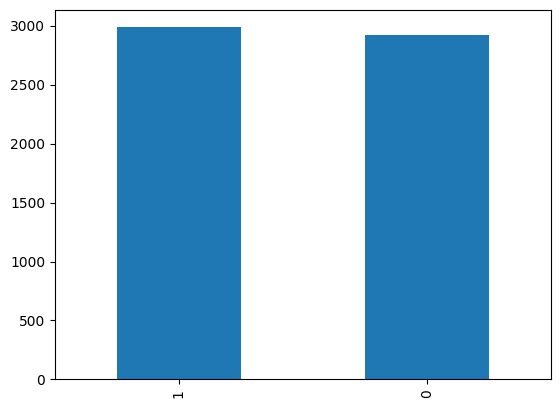

In [11]:
# data balance check in gender column
data['gender'].value_counts().plot(kind = 'bar')

<Axes: >

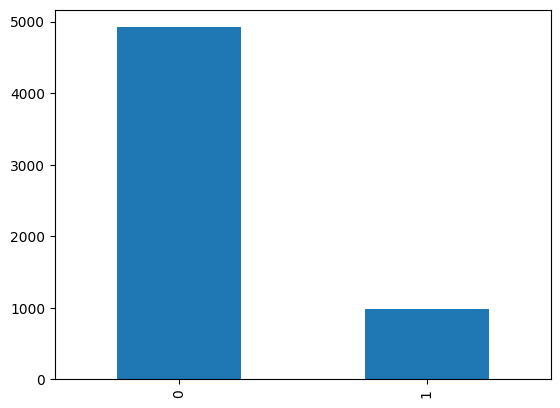

In [12]:
# data balance check in match column which shows unbalance in data 
data['match'].value_counts().plot(kind = 'bar')

In [13]:
#the data unbalanced most of records is unmatched
pd.crosstab(index=data['match'],columns="count")

col_0,count
match,
0,4921
1,988


In [14]:
# check null values for each column and store 
nulls = pd.DataFrame([data.isna().sum().tolist()], columns=data.isna().sum().index)
nulls

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,0,0,0,0,0,1318,0,0,8,0,109,0,65,48,59,59,59,66,73,83,153,209,220,265,512,787,183,235,275,63,45,59,2442,3674,3365,45,58,58,58,720,2862,58,72,58,64,100,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,70,4627,58,58,58,65,71,88,1346,1346,1346,1346,1346,1363,58,58,58,58,65,65,81,81,81,81,81,2452,2452,2452,2452,2452,143,200,205,256,504,762,175,227,252,826,2994,2994,2994,2994,2994,2994,3069,3069,3069,3069,3069,647,647,670,4498,4519,4498,4498,4519,4505,658,647,647,647,647,647,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,647,647,647,647,647,2821,2821,2821,2821,2821,3105,3105,3105,4849,5449,3105,3105,3105,3105,3105,3105,4496,4496,4496,4496,4496,4496,3838,3838,3838,3838,3838,3838,3838,3838,3838,3838,3838,4496,3105,3105,3105,3105,3105,4496,4496,4496,4496,4496,0


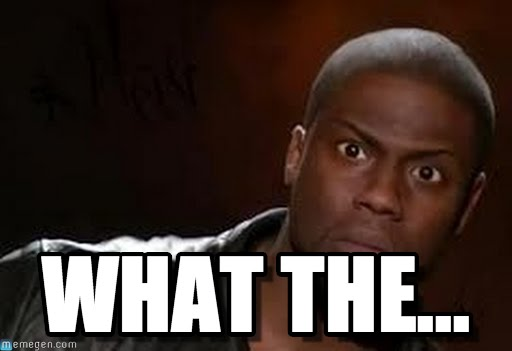

In [15]:
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
percent

num_in_3    0.922153
numdat_3    0.820613
expnum      0.783043
amb7_2      0.764766
sinc7_2     0.764766
              ...   
position    0.000000
round       0.000000
wave        0.000000
condtn      0.000000
id          0.000000
Length: 192, dtype: float64

In [16]:
dropped_col =percent[percent.values >0.6].index
dropped_col

Index(['num_in_3', 'numdat_3', 'expnum', 'amb7_2', 'sinc7_2', 'shar7_2',
       'fun7_2', 'intel7_2', 'attr7_2', 'attr7_3', 'sinc7_3', 'intel7_3',
       'fun7_3', 'amb7_3', 'shar7_3', 'shar2_3', 'attr5_3', 'sinc5_3',
       'intel5_3', 'fun5_3', 'amb5_3', 'shar4_3', 'fun4_3', 'intel4_3',
       'sinc4_3', 'attr4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3',
       'amb2_3', 'amb4_3', 'mn_sat'],
      dtype='object')

In [17]:
train = data.drop(['num_in_3', 'numdat_3', 'expnum', 'sinc7_2', 'amb7_2', 'shar7_2',
       'attr7_2', 'intel7_2', 'fun7_2', 'attr5_3', 'shar7_3', 'shar2_3',
       'sinc5_3', 'intel5_3', 'attr7_3', 'sinc7_3', 'fun5_3', 'intel7_3',
       'fun7_3', 'amb5_3', 'amb7_3', 'sinc4_3', 'attr4_3', 'intel4_3',
       'fun4_3', 'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3',
       'amb2_3', 'amb4_3', 'mn_sat'],axis=1)

In [18]:
# filtering unnecessary columns
train.drop(columns=['id','idg','partner','pid'],axis=1,inplace=True)

In [19]:
train

,gender,condtn,wave,round,position,positin1,order,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3
0,0,2,14,18,2,2.0,14,0,-0.03,0,27.0,2.0,30.00,15.00,15.00,20.00,5.00,15.00,7.0,7.0,7.0,6.0,5.0,NaN,7.0,1.0,2.0,33.0,Ed.D. in higher education policy at TC,9.0,University of Michigan-Ann Arbor,"21,645.00",3.0,2.0,1.0,"Palo Alto, CA",NaN,NaN,1.0,6.0,3.0,University President,2.0,3.0,4.0,4.0,10.0,9.0,10.0,1.0,1.0,8.0,7.0,10.0,8.0,10.0,1.0,4.0,10.0,4.0,2.0,40.00,15.00,25.00,5.00,15.00,0.00,55.0,10.0,5.0,15.0,5.0,10.0,70.00,5.00,5.00,15.00,5.00,0.00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,5.0,7.0,6.0,6.0,NaN,6.0,4.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1.0,2.0,60.00,10.00,10.00,10.00,10.00,0.00,45.0,25.0,5.0,25.0,0.0,0.0,65.00,5.00,5.00,25.00,0.00,0.00,10.0,10.0,10.0,9.0,10.0,10.0,9.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,3,10,2,NaN,8,0,0.21,0,24.0,4.0,5.00,15.00,45.00,25.00,0.00,10.00,3.0,8.0,5.0,3.0,7.0,1.0,1.0,3.0,2.0,22.0,Engineering,5.0,NaN,NaN,2.0,8.0,1.0,"Boston, MA","2,021",NaN,5.0,6.0,1.0,Engineer or iBanker or consultant,7.0,8.0,3.0,7.0,10.0,6.0,6.0,7.0,2.0,9.0,5.0,6.0,7.0,7.0,6.0,8.0,8.0,4.0,7.0,21.00,20.00,19.00,20.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,15.00,10.00,20.00,10.00,15.00,7.0,9.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,5.0,8.0,8.0,5.0,7.0,6.0,6.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,3.0,22.00,17.00,17.00,17.00,10.00,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,20.00,20.00,15.00,20.00,10.00,15.00,6.0,8.0,8.0,7.0,8.0
2,1,1,13,10,8,8.0,10,0,0.43,0,34.0,2.0,15.00,15.00,10.00,25.00,10.00,25.00,4.0,8.0,7.0,4.0,7.0,3.0,3.0,2.0,2.0,27.0,Urban Planning,5.0,"Rizvi College of Architecture, Bombay University",NaN,6.0,1.0,1.0,"Bombay, India",NaN,NaN,1.0,4.0,2.0,Real Estate Consulting,7.0,4.0,2.0,7.0,6.0,8.0,8.0,8.0,6.0,6.0,8.0,4.0,10.0,10.0,7.0,7.0,5.0,10.0,2.0,10.00,20.00,25.00,20.00,20.00,5.00,25.0,5.0,20.0,25.0,10.0,15.0,25.00,10.00,20.00,25.00,10.00,10.00,7.0,9.0,7.0,9.0,10.0,7.0,9.0,9.0,7.0,9.0,6.0,5.0,7.0,5.0,7.0,6.0,6.0,5.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,3.0,15.00,20.00,20.00,15.00,20.00,10.00,25.0,15.0,10.0,25.0,10.0,15.0,15.00,20.00,20.00,20.00,15.00,10.00,7.0,9.0,9.0,8.0,10.0,7.0,9.0,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,9,20,18,13.0,6,0,0.72,1,25.0,2.0,13.21,18.87,18.87,16.98,16.98,15.09,5.0,9.0,7.0,5.0,8.0,NaN,7.0,6.0,2.0,31.0,International Affairs,13.0,NaN,NaN,2.0,4.0,7.0,"Washington, DC","10,471","45,300.00",2.0,5.0,4.0,public service,9.0,5.0,5.0,9.0,8.0,7.0,8.0,9.0,3.0,8.0,7.0,4.0,6.0,8.0,7.0,7.0,3.0,5.0,4.0,17.78,17.78,17.78,17.78,13.33,15.56,9.0,7.0,8.0,7.0,7.0,7.0,19.15,17.02,17.02,17.02,14.89,14.89,8.0,8.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,8.0,8.0,9.0,10.0,9.0,9.0,9.0,7.0,2.0,NaN,16.67,18.52,18.52,18.52,12.96,14.81,7.0,8.0,8.0,9.0,7.0,8.0,1.0,3.0,16.00,20.

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 155 entries, gender to amb3_3
dtypes: float64(140), int64(8), object(7)
memory usage: 7.0+ MB


In [21]:
# extracting object columns
features_obj = list(train.select_dtypes(include=['object']))
features_obj

['field', 'undergra', 'tuition', 'from', 'zipcode', 'income', 'career']

In [22]:
train[['field', 'undergra', 'tuition', 'from', 'zipcode', 'income', 'career']]

,field,undergra,tuition,from,zipcode,income,career
0,Ed.D. in higher education policy at TC,University of Michigan-Ann Arbor,"21,645.00","Palo Alto, CA",NaN,NaN,University President
1,Engineering,NaN,NaN,"Boston, MA","2,021",NaN,Engineer or iBanker or consultant
2,Urban Planning,"Rizvi College of Architecture, Bombay University",NaN,"Bombay, India",NaN,NaN,Real Estate Consulting
3,International Affairs,NaN,NaN,"Washington, DC","10,471","45,300.00",public service
4,Business,Harvard College,"26,019.00",Midwest USA,"66,208","46,138.00",undecided
...,...,...,...,...,...,...,...
5904,Clinical Psychology,NaN,NaN,New York,"11,803","65,708.00",Psychologist
5905,MBA,NaN,NaN,Colombia,NaN,NaN,Consulting
5906,MA Science Education,University of Washington,"13,258.00",Seattle,"98,115","37,881.00",Teacher
5907,Biochemistry,NaN,NaN,Canada,NaN,NaN,pharmaceuticals and biotechnology


In [23]:
# we can drop the field and career as we already have a field_code and a career_code columns
train.drop(['field','career'],axis=1,inplace=True)

In [24]:
# we need to replace the commas in the values to be able to convert it floats
train[['tuition','income']] = train[['tuition','income']].replace(',','', regex=True)

In [25]:
# we need to convert the type of tutition and income to be float because they represent numeric values
train[['tuition','income']] = train[['tuition','income']].astype("float64")

In [26]:
train[['tuition','income']]

,tuition,income
0,21645.0,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,45300.0
4,26019.0,46138.0
...,...,...
5904,NaN,65708.0
5905,NaN,NaN
5906,13258.0,37881.0
5907,NaN,NaN


In [27]:
# split data 
from sklearn.model_selection import train_test_split
y = train['match'] 
X = train.drop('match', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [28]:
# numeric features extraction 
features_numeric = list(X_train.select_dtypes(include=['float64', 'int64']))

In [29]:
# categorical features extraction
features_categorical = list(X_train.select_dtypes(include=['category']))

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [31]:
# numeric feature preprocessing pipeline
transformer_numeric = Pipeline(steps=[('imputer', SimpleImputer()),('scaler', StandardScaler())])

In [32]:
# categorical feature preprocessing pipeline
transformer_categorical = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [33]:
# preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[('num', transformer_numeric, features_numeric),('cat', transformer_categorical, features_categorical)])

In [34]:
pipeline_ = Pipeline(steps=[('preprocessor', preprocessor),('my_classifier',RandomForestClassifier(),)])
pipeline_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'samerace',
                                                   'age_o', 'race_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 'fun_o', 'amb_o',
                                                   'shar_o', 'like_o', 'prob_o',
                                                   'met_o', 'age', 'field_cd',
                                                   'tuition', 'race', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('my_classifier', RandomForestClassifier())])

# Hyperparameter Tunning

## Grid Search with Cross-validation

###Trial 1 [Random forest]

In [35]:
# defining the parameters search space
param_grid = {'preprocessor__num__imputer__strategy': ['mean','median','most_frequent'],
              # n_estimators => number of trees in random forest
              'my_classifier__n_estimators': [90,110,130,150],
              'my_classifier__max_depth':[10, 20, 30]}

In [36]:
grid_search = GridSearchCV(pipeline_, param_grid, cv=5, verbose=1, n_jobs=-1,scoring='roc_auc')

In [37]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gender',
                                                                          'condtn',
                                                                          'wave',
                                                                          'round',
                                                                          'position',
                                                                          'positin1',
                                                                          'order',
                                                                          'int_corr',
                                                                          'samerace',
                                                                          'age_o',
                                                                          'race_o',
                                                                          'pf_o_att',
                                                                          'pf_o_sin',
                                                                          'pf_o_int',
                                                                          'pf_o_fun',
                                                                          'pf_o_amb',
                                                                          'pf_o_sha',
                                                                          'attr_o'...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('my_classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'my_classifier__max_depth': [10, 20, 30],
                         'my_classifier__n_estimators': [90, 110, 130, 150],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']},
             scoring='roc_auc', verbose=1)

In [38]:
print('best score {}'.format(grid_search.best_score_))
print('best params {}'.format(grid_search.best_params_))
print('best estimator {}'.format(grid_search.best_estimator_))

best score 0.8521956203707142
best params {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 130, 'preprocessor__num__imputer__strategy': 'mean'}
best estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'samerace',
                                                   'age_o', 'race_o',
                                        

In [39]:
# score of model on test 
grid_search.score(X_test,y_test)

0.8691149749893146

> Thoughts and observations for trial 1

 The model is good fitting  😍 ✌

> plan for trial 2

Try another classifier

###Trial 2 [XGBClassifier]

In [60]:
pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor),('my_classifier',XGBClassifier(objective="binary:logistic"),)])
pipeline_2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'samerace',
                                                   'age_o', 'race_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 'fun_o',...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [66]:
param_grid = {'preprocessor__num__imputer__strategy': ['mean','median','most_frequent'],
              'my_classifier__eta': [0.01, 0.001, 0.1],
              'my_classifier__max_depth':[10, 20, 30]}
grid_search = GridSearchCV(
    pipeline_2, param_grid, cv=5, verbose=1, n_jobs=-1, 
    scoring='roc_auc')

In [67]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gender',
                                                                          'condtn',
                                                                          'wave',
                                                                          'round',
                                                                          'position',
                                                                          'positin1',
                                                                          'order',
                                                                          'int_corr',
                                                                          'samerace',
                                                                          'age_o',
                                                                          'race_o',
                                                                          'pf_o_att',
                                                                          'pf_o_sin',
                                                                          'pf_o_int',
                                                                          'pf_o_fun',
                                                                          'pf_o_amb',
                                                                          'pf_o_sha',
                                                                          'attr_o'...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'my_classifier__eta': [0.01, 0.001, 0.1],
                         'my_classifier__max_depth': [10, 20, 30],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']},
             scoring='roc_auc', verbose=1)

In [68]:
print('best score {}'.format(grid_search.best_score_))
print('best params {}'.format(grid_search.best_params_))

best score 0.8675693593693928
best params {'my_classifier__eta': 0.1, 'my_classifier__max_depth': 20, 'preprocessor__num__imputer__strategy': 'median'}


In [69]:
# score of model on test 
grid_search.score(X_test,y_test)

0.8777120931494338

> Thoughts and observations for trial 2

 The model is outperformed the first experiment 😍 ✌

> plan for trial 3

Try the same classifier but with another hyperparameter search technique

## Random Search 

###Trial 3 [XGBClassifier]

In [56]:
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

grid_search = RandomizedSearchCV(
    pipeline_2, param_grid, cv=5, verbose=1, n_jobs=-1, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

In [57]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['gender',
                                                                                'condtn',
                                                                                'wave',
                                                                                'round',
                                                                                'position',
                                                                                'positin1',
                                                                                'order',
                                                                                'int_corr',
                                                                                'samerace',
                                                                                'age_o',
                                                                                'race_o',
                                                                                'pf_o_att',
                                                                                'pf_o_sin',
                                                                                'pf_o_int',
                                                                                'pf_o_fun',
                                                                                'pf_o_amb',
                                                                                'pf_o_sha',
                                                                                'a...
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'my_classifier__max_depth': [10, 20,
                                                                     30],
                                        'my_classifier__n_estimators': [90, 110,
                                                                        130,
                                                                        150],
                                        'preprocessor__num__imputer__strategy': ['mean',
                                                                                 'median',
                                                                                 'most_frequent']},
                   scoring='roc_auc', verbose=1)

In [58]:
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

best score 0.8640134903251621
best score {'preprocessor__num__imputer__strategy': 'most_frequent', 'my_classifier__n_estimators': 130, 'my_classifier__max_depth': 10}


In [59]:
# score of model on test 
grid_search.score(X_test,y_test)

0.8717185063458637

> Thoughts and observations for trial 3

 Hmm.. This is a good result but there's no sign of improvement unfortunately 😤

> plan for trial 4

Try another classifier

###Trial 4 [AdaBoostClassifier]

In [71]:
pipeline_3 = Pipeline(steps=[('preprocessor', preprocessor),('my_classifier',AdaBoostClassifier(),)])
pipeline_3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'samerace',
                                                   'age_o', 'race_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 'fun_o', 'amb_o',
                                                   'shar_o', 'like_o', 'prob_o',
                                                   'met_o', 'age', 'field_cd',
                                                   'tuition', 'race', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('my_classifier', AdaBoostClassifier())])

In [72]:
param_grid = {'preprocessor__num__imputer__strategy': ['mean','median','most_frequent'],
              'my_classifier__learning_rate': [0.01, 0.001, 0.1],
              'my_classifier__n_estimators':[50, 100, 120],
              'my_classifier__algorithm':['SAMME', 'SAMME.R']}

In [73]:
grid_search = RandomizedSearchCV(
    pipeline_2, param_grid, cv=5, verbose=1, n_jobs=-1, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

In [74]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[07:49:10] WARNING: ../src/learner.cc:767: 
Parameters: { "algorithm" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['gender',
                                                                                'condtn',
                                                                                'wave',
                                                                                'round',
                                                                                'position',
                                                                                'positin1',
                                                                                'order',
                                                                                'int_corr',
                                                                                'samerace',
                                                                                'age_o',
                                                                                'race_o',
                                                                                'pf_o_att',
                                                                                'pf_o_sin',
                                                                                'pf_o_int',
                                                                                'pf_o_fun',
                                                                                'pf_o_amb',
                                                                                'pf_o_sha',
                                                                                'a...
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'my_classifier__algorithm': ['SAMME',
                                                                     'SAMME.R'],
                                        'my_classifier__learning_rate': [0.01,
                                                                         0.001,
                                                                         0.1],
                                        'my_classifier__n_estimators': [50, 100,
                                                                        120],
                                        'preprocessor__num__imputer__strategy': ['mean',
                                                                                 'median',
                                                                                 'most_frequent']},
                   scoring='roc_auc', verbose=1)

In [75]:
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

best score 0.869316574063762
best score {'preprocessor__num__imputer__strategy': 'most_frequent', 'my_classifier__n_estimators': 100, 'my_classifier__learning_rate': 0.1, 'my_classifier__algorithm': 'SAMME.R'}


In [76]:
# score of model on test 
grid_search.score(X_test,y_test)

0.8756804018884384

> Thoughts and observations for trial 3

0.87 again 😤 My only suggestion for this repeated result is that all the models that had been tried are ensemble models 😏 Perhaps that is the reason

> plan for trial 5

Try another classifier with another hyperparameter search technique

## Bayesian Search

In [46]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.9 MB/s eta 0:00:00


In [47]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

###Trial 5 [Decision Tree]

In [86]:
DT_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_dt', DecisionTreeClassifier())
    ]
)

In [87]:
bayes_search = BayesSearchCV(
    DT_pipline,
    {
        'my_dt__criterion': ['gini', 'entropy', 'log_loss'],
        'my_dt__splitter': ['best', 'random'],
        'my_dt__max_depth': [10, 20, 30]
     },
    n_iter=3,
    verbose=1,
    cv=5,
)

In [88]:
bayes_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('num',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer()),
                                                                                          ('scaler',
                                                                                           StandardScaler())]),
                                                                          ['gender',
                                                                           'condtn',
                                                                           'wave',
                                                                           'round',
                                                                           'position',
                                                                           'positin1',
                                                                           'order',
                                                                           'int_corr',
                                                                           'samerace',
                                                                           'age_o',
                                                                           'race_o',
                                                                           'pf_o_att',
                                                                           'pf_o_sin',
                                                                           'pf_o_int',
                                                                           'pf_o_fun',
                                                                           'pf_o_amb',
                                                                           'pf_o_sha',
                                                                           'attr_o...
                                                                           'field_cd',
                                                                           'tuition',
                                                                           'race', ...]),
                                                                         ('cat',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer(strategy='constant')),
                                                                                          ('onehot',
                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                          [])])),
                                        ('my_dt', DecisionTreeClassifier())]),
              n_iter=3,
              search_spaces={'my_dt__criterion': ['gini', 'entropy',
                                                  'log_loss'],
                             'my_dt__max_depth': [10, 20, 30],
                             'my_dt__splitter': ['best', 'random']},
              verbose=1)

In [89]:
print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

best score 0.8075256356229807
best score OrderedDict([('my_dt__criterion', 'log_loss'), ('my_dt__max_depth', 30), ('my_dt__splitter', 'best')])


In [90]:
# score of model on test 
bayes_search.score(X_test,y_test)

0.801025641025641

> Thoughts and observations for trial 5

 The model is good fitting but I think this is the worst score we could see ever! 🤐

> plan for trial 2

Try the XGBClassifier with the Bayesian Search Technique 

###Trial 6 [XGBClassifier]

In [91]:
param_grid = {'preprocessor__num__imputer__strategy': ['mean','median','most_frequent'],
              'my_classifier__eta': [0.01, 0.001, 0.1],
              'my_classifier__max_depth':[10, 20, 30]}

In [92]:
bayes_search = BayesSearchCV(
    pipeline_2,
    param_grid,
    n_iter=3,
    verbose=1,
    cv=5,
)

In [93]:
bayes_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('num',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer()),
                                                                                          ('scaler',
                                                                                           StandardScaler())]),
                                                                          ['gender',
                                                                           'condtn',
                                                                           'wave',
                                                                           'round',
                                                                           'position',
                                                                           'positin1',
                                                                           'order',
                                                                           'int_corr',
                                                                           'samerace',
                                                                           'age_o',
                                                                           'race_o',
                                                                           'pf_o_att',
                                                                           'pf_o_sin',
                                                                           'pf_o_int',
                                                                           'pf_o_fun',
                                                                           'pf_o_amb',
                                                                           'pf_o_sha',
                                                                           'attr_o...
                                                       max_leaves=None,
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       n_estimators=100,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       predictor=None,
                                                       random_state=None, ...))]),
              n_iter=3,
              search_spaces={'my_classifier__eta': [0.01, 0.001, 0.1],
                             'my_classifier__max_depth': [10, 20, 30],
                             'preprocessor__num__imputer__strategy': ['mean',
                                                                      'median',
                                                                      'most_frequent']},
              verbose=1)

In [94]:
print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

best score 0.8580440945485194
best score OrderedDict([('my_classifier__eta', 0.1), ('my_classifier__max_depth', 20), ('preprocessor__num__imputer__strategy', 'median')])


In [95]:
# score of model on test 
bayes_search.score(X_test,y_test)

0.8743589743589744

> Thoughts and observations for trial 6

Ahhh! 🤦‍♀️ I worked so hard to get something better than the 0.87 but looks like it's going to stick with me along the way 👯‍♀️